# Aula 05 - Treinando Análise Exploratória

In [148]:
%matplotlib inline
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


Vamos fazer uma análise exploratória sobre um dataset sobre carros.

Fonte: [Auto MPG dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [149]:
data = pd.read_csv("auto_mpg_sub.csv")

**Dicionário de dados:**


Variável | Descrição
:---:|---:
mpg | consumo em miles per gallon
cylinders | número de cilindros do motor do carro
displacement | deslocamento dos cilindros em polegadas cúbicas
horsepower | potência do veículo (HP)
weight | peso do veículo (libras)
acceleration | aceleração do veículo
model year | ano do modelo
origin | origem - veja abaixo
car name | nome do carro

A variável *origin* identifica o país de origem de um veículo

Valor | Origem
:---:|:---:
1 | Estados Unidos da América
2 | Europa
3 | Japão

In [150]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


## Questão 1 - Manipulando Dataframes

**a.** Considerando que $1\ milha = 1.60934\ km$ e que $1\ gallon = 3.78541\ litros$, crie uma coluna **rendimento** que meça o consumo em $km/l$.

Use como base a coluna ```mpg``` que atualmente está medindo o consumo em $\frac{mi}{gallon}$

In [151]:
data['rendimento'] = data['mpg'] * 1.60934 / 3.78541

**b.** Qual a proporção de carros fabricados no EUA cujo o rendimento de um carro é maior ou igual a $16\ km/l$? Compare o resultado com os carros fabricados na Europa e no Japão.

In [152]:
proporcao_us = len(data[(data['rendimento']>=16)&(data['origin']==1)])/len(data)*100
proporcao_eu = len(data[(data['rendimento']>=16)&(data['origin']==2)])/len(data)*100
proporcao_jp = len(data[(data['rendimento']>=16)&(data['origin']==3)])/len(data)*100

print('{0}% us\n{1}% eu\n{2}% japao'.format(proporcao_us, proporcao_eu, proporcao_jp))

0.7653061224489796% us
1.2755102040816326% eu
2.295918367346939% japao


**c.** O governo americano vai isentar de imposto anual os carros produzidos após 1975 (incluindo o próprio ano) e que estiverem entre os 20% mais econômicos. Qual deve ser o consumo em `mpg` que um carro deve ter para ter a isenção?  Responda usando os dados

In [153]:
imposto= data[(data['model year'] >= 75)].mpg.quantile(.8)
imposto

33.0

##### **d.** Quais os 5 carros com o maior consumo? Quais os valores apontados?

In [154]:
consumo = data.sort_values(by="mpg").head(5)
consumo

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,rendimento
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d,3.826286
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20,4.251429
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250,4.251429
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200,4.676571
123,11.0,8,350.0,180,3664,11.0,73,1,oldsmobile omega,4.676571


## Questão 2 - Medidas Resumo

**a.** Alguém conjecturou que a maioria dos carros possuem uma potência (horsepower) maior que a média. Você deve avaliar esta proposição. Verifique se há assimetria nos dados.

104.46938775510205 média;
93.5 mediana


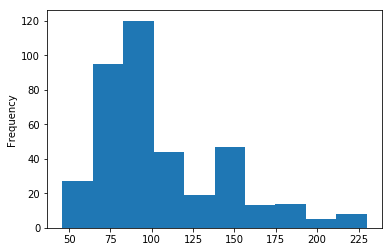

In [155]:
media = data['horsepower'].mean()
med = data['horsepower'].median()
# média sobe bastante em relação à mediana (assimetia a direita)
print('{0} média;\n{1} mediana' .format(media, med))
data['horsepower'].plot.hist();

**b.** Faça também uma avaliação completa da aceleração (acceleration) dos carros.

In [165]:
data['acceleration'].describe()

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

## Questão 3 - Analisando 2 variáveis

**a.** Existe uma associação sobre potência e aceleração veículo? Você consegue dizer quão forte é essa associação? Extraia a reta correspondente da dispersão.

In [157]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 20.701933699127135
Coeficiente angular: -0.04939827139230913


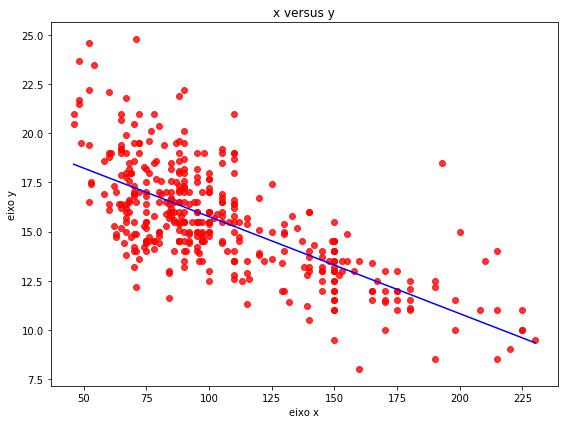

,horsepower,acceleration
horsepower,1.000000,-0.689196
acceleration,-0.689196,1.000000


In [158]:
dados_x = data['horsepower']
dados_y = data['acceleration']
reta(dados_x, dados_y)
data.loc[:, ['horsepower', 'acceleration']].corr()

**b.** Será que o peso também influencia na aceleração? Extraia a reta correspondente da dispersão.

Ajuste linear entre X3 e X4:
Coeficiente linear: 4972.111073392893
Coeficiente angular: -128.33697855783046


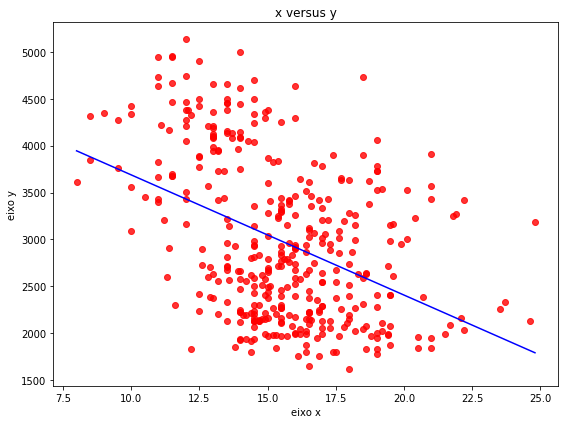

,acceleration,weight
acceleration,1.000000,-0.416839
weight,-0.416839,1.000000


In [159]:
dados_x = data['acceleration']
dados_y = data['weight']
reta(dados_x, dados_y)
data.loc[:, ['acceleration', 'weight']].corr()

**c.** Será que o número de cilindros influencia na potência? Se a dispersão não ficar satisfatória, ache uma ferramenta mais adequada para a análise do que o gráfico de dispersão ou linha de tendência.

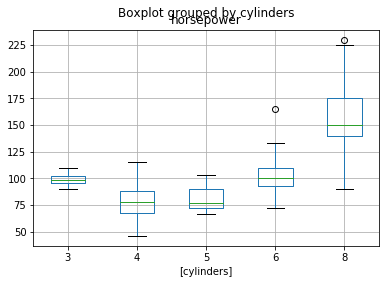

In [160]:
data.loc[:,['horsepower','cylinders']].boxplot(by='cylinders');

**d.** Você também notou que os motores de 3 cilindros são mais potentes que os de 4 cilindros nesta base de dados? Como você explica isso? Dica: comece explorando a base de dados e vá além.

In [161]:
data[(data.cylinders==3)].loc[:, 'car name']

70     mazda rx2 coupe
110          maxda rx3
241         mazda rx-4
331      mazda rx-7 gs
Name: car name, dtype: object

## Questão 4 - Manipulando dados

Avalie a seguinte asserção: os carros americanos foram ficando mais econômicos com o passar do tempo? 

Procure quantificar sua resposta com recursos vistos ao longo da disciplina.

Cruze com informações históricas a cerca do tema.


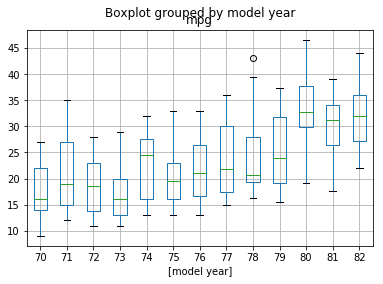

In [162]:
data.loc[:, ['model year', 'mpg']].boxplot(by="model year")

In [163]:
data.loc[:, ['rendimento', 'model year']].corr()

,rendimento,model year
rendimento,1.000000,0.580541
model year,0.580541,1.000000
